In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Random Walk
- A tool to help understand the predictability of time-series forecast problem

## Random Walk Process
1. Start with a random number either -1 or 1
2. Randomly select a -1 or 1 then add it to the observation from the previous time step
3. Repeat step 2 as:
	$$y(t) =  B_0 + B_1 * X(t-1) + e(t)$$
	- $B_0$: a constant driff to the random walk
	- $B_1$: a coefficient to weight the previous time step
	- $X(t-1)$: the observation at the previous time step
	- $e(t)$: white noise time=t

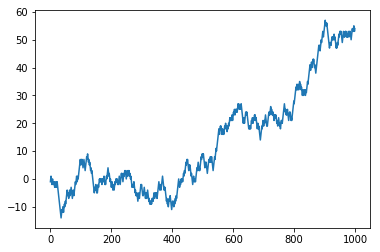

In [2]:
# create and plot a random walk
from random import seed
from random import random

seed(1)
random_walk = list()

# 1.
random_walk.append(-1 if random() < 0.5 else 1)

# 2., 3.
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

plt.plot(random_walk);

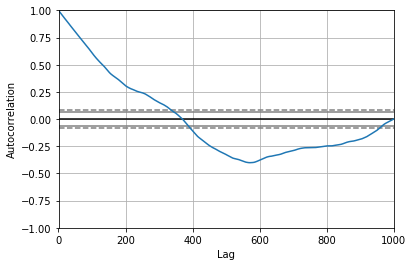

In [3]:
# Autocorrelation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(random_walk);

## Stationarity
- A stationary time series = A series that the values are not a function of time (Random walk = time series that depend on time)

## Predicting a Random Walk

### Persistence Prediction

In [4]:
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# Persistence Prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    y_hat = history
    predictions.append(y_hat)
    history = test[i]

# Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


### Random Prediction

In [5]:
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    y_hat = history + (-1 if random() < 0.5 else 1)
    predictions.append(y_hat)
    history = test[i]

rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.328
